**课程作业三：基于支持向量机的手写数字识别**
github：https://github.com/dypw/homework3

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/content/minist'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sklearn
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist     
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print('X_train Shape :' + str(X_train.shape))   #shape of Data
print('Y_train Shape :' + str(Y_train.shape))
print('X_test Shape :' + str(X_test.shape))
print('Y_test Shape :' + str(Y_test.shape))

X_train Shape :(60000, 28, 28)
Y_train Shape :(60000,)
X_test Shape :(10000, 28, 28)
Y_test Shape :(10000,)


In [5]:
X_pixels =X_train.flatten()    #flattening the input pixel from 28*28 to 784
X=X_pixels.reshape(60000,784)
Xtest = X_test.flatten()
Xtest = Xtest.reshape(10000,784)
print(X.shape)
print(Xtest.shape)

(60000, 784)
(10000, 784)


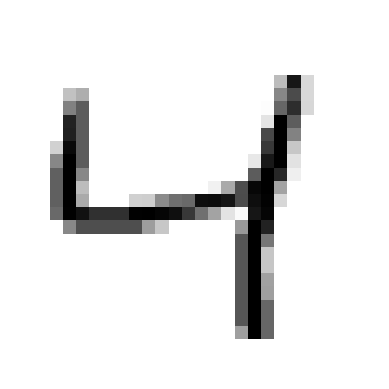

In [6]:
import matplotlib
some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
 interpolation="nearest")
plt.axis("off")
plt.show()


In [7]:
from sklearn.svm import SVC 
svc = SVC(kernel='rbf', C=1).fit(X, Y_train)    #training the data
y_pred = svc.predict(Xtest)  
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


<Axes: >

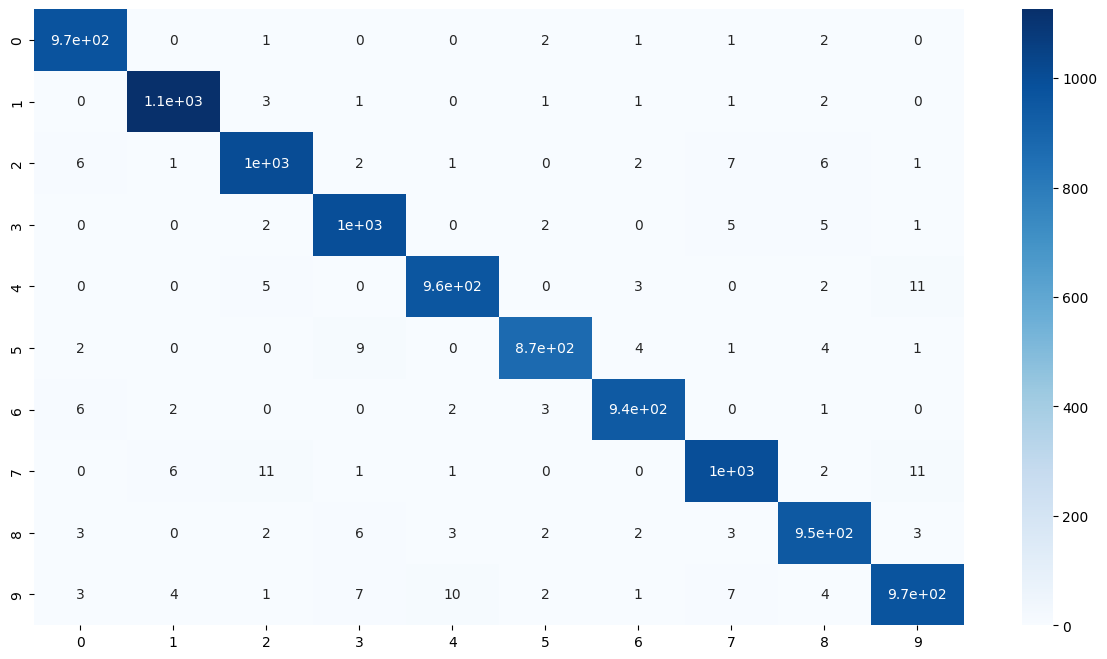

In [8]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion, annot=True, 
             cmap='Blues')

In [9]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10']))



Accuracy: 0.98

Micro Precision: 0.98
Micro Recall: 0.98
Micro F1-score: 0.98

Macro Precision: 0.98
Macro Recall: 0.98
Macro F1-score: 0.98

Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98

Classification Report

              precision    recall  f1-score   support

     Class 1       0.98      0.99      0.99       980
     Class 2       0.99      0.99      0.99      1135
     Class 3       0.98      0.97      0.98      1032
     Class 4       0.97      0.99      0.98      1010
     Class 5       0.98      0.98      0.98       982
     Class 6       0.99      0.98      0.98       892
     Class 7       0.99      0.99      0.99       958
     Class 8       0.98      0.97      0.97      1028
     Class 9       0.97      0.98      0.97       974
    Class 10       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



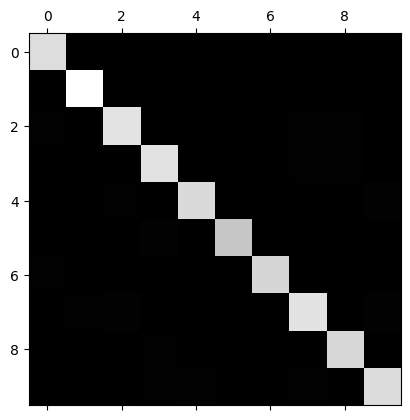

In [10]:
plt.matshow(confusion, cmap=plt.cm.gray)
plt.show()

**Error Analysis** 

In [11]:
row_sums = confusion.sum(axis=1, keepdims=True)
norm_conf_mx = confusion / row_sums

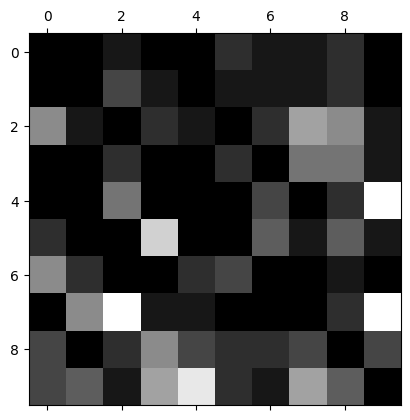

In [12]:
np.fill_diagonal(confusion, 0)
plt.matshow(confusion, cmap=plt.cm.gray)
plt.show()

In [13]:
from sklearn.model_selection import cross_val_predict
sv = SVC(kernel='rbf', C=1)
y_train_pred = cross_val_predict(sv, X, Y_train, cv=3)

In [14]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

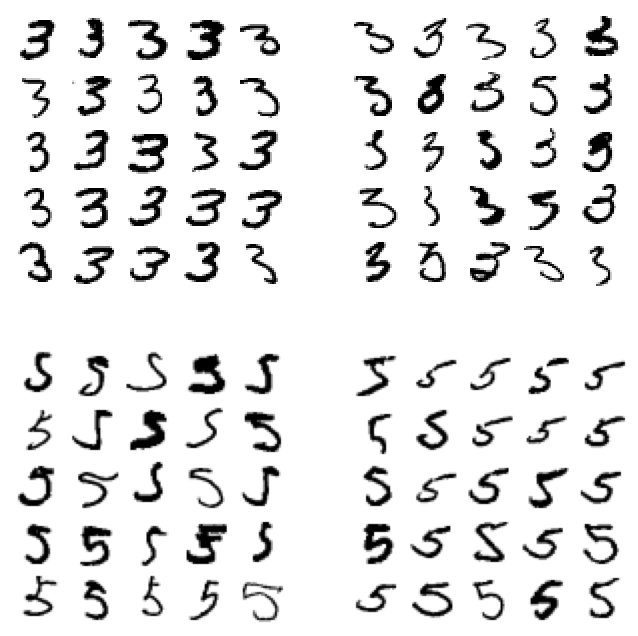

In [15]:
cl_a, cl_b = 3, 5
X_aa = X[(Y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X[(Y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X[(Y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X[(Y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()